<a href="https://colab.research.google.com/github/DarkSABBATH/Day1_assignment/blob/main/AML_assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
#Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#To display plots inline in some environments like Jupyter/Colab
%matplotlib inline

In [16]:
#Data Loading
df = pd.read_csv('/content/Wholesale_Customers_Data.csv')
print("First 5 rows of the dataset:")
print(df.head())


First 5 rows of the dataset:
   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


In [17]:
# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# For this dataset, if there are missing values, fill numerical ones with median
# Adjust based on actual missing values
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    if df[col].isnull().sum() > 0:
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)



Missing values per column:
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64


In [20]:
# Simple Transformation
# Example: Create a new feature - total spend across all categories
spend_cols = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
df['Total_Spend'] = df[spend_cols].sum(axis=1)
print("\nAdded new feature 'Total_Spend'. Sample values:")
print(df[['Total_Spend']].head())


Added new feature 'Total_Spend'. Sample values:
   Total_Spend
0        34112
1        33266
2        36610
3        27381
4        46100


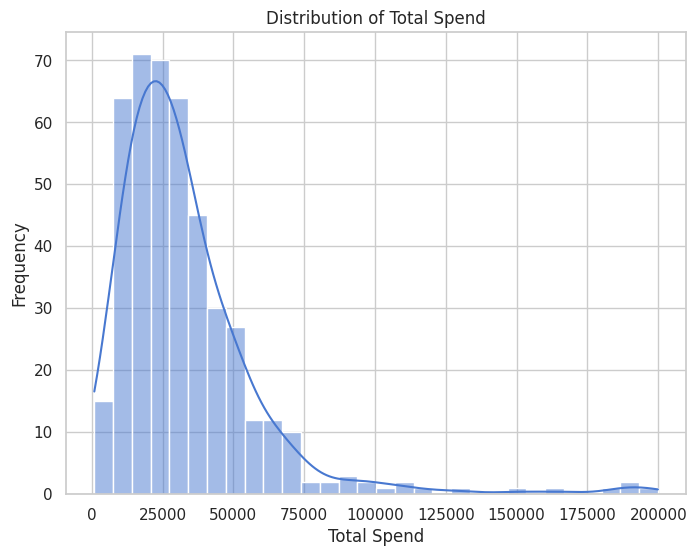

In [21]:
# Set seaborn style
sns.set(style='whitegrid', palette='muted')

# 5.1 Distribution of a Key Variable (e.g., Total Spend)
plt.figure(figsize=(8,6))
sns.histplot(df['Total_Spend'], bins=30, kde=True)
plt.title('Distribution of Total Spend')
plt.xlabel('Total Spend')
plt.ylabel('Frequency')
plt.show()

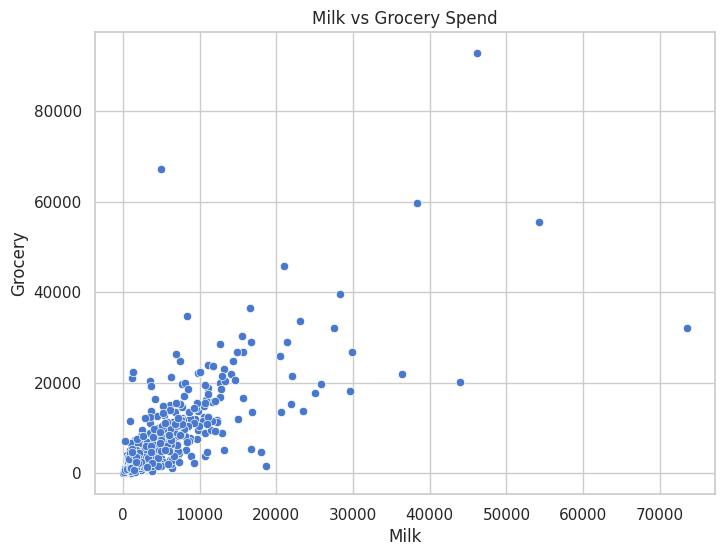

In [30]:
#Relationship Between Two Numerical Variables (Milk vs Grocery)
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Milk', y='Grocery')
plt.title('Milk vs Grocery Spend')
plt.xlabel('Milk')
plt.ylabel('Grocery')
plt.show()


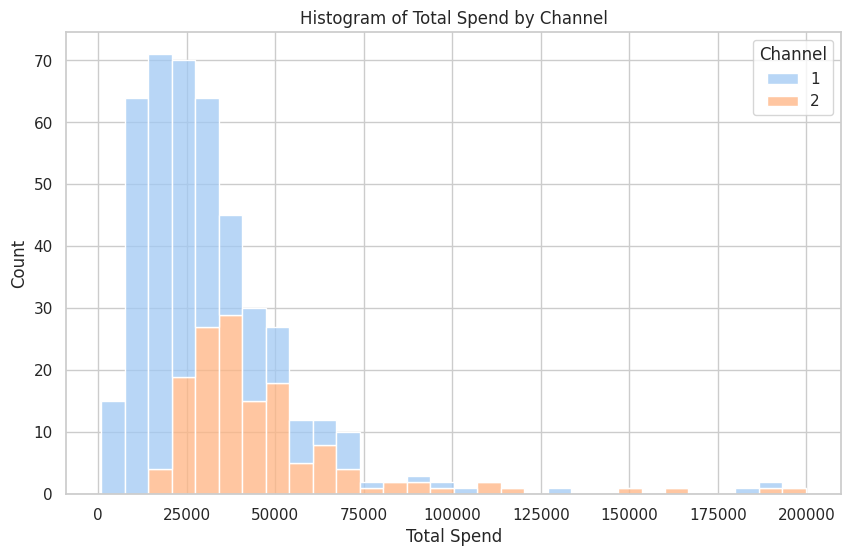

In [38]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Total_Spend', bins=30, hue='Channel', multiple='stack', palette='pastel')
plt.title('Histogram of Total Spend by Channel')
plt.xlabel('Total Spend')
plt.ylabel('Count')
plt.show()